In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, MultiLabelBinarizer

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample against a Normal distribution,
# to see whether your sample is normally distributed or not

# Load Dataset:
**orgin_resturant_dataset** contains:
place_id,name, reviews, main_categories, main_ratings, address, resturant google review & photo link

**origin_reviews_dataset** contains: place_id	name,	review_id	rating, review_text,	published_at,	published_at_date, review_likes_count, 	response_from_owner_text, response_from_owner_ago, response_from_owner_date,	total_number_of_reviews_by_reviewer	,total_number_of_photos_by_reviewer,	is_local_guide,	review_translated_text,	response_from_owner_translated_text


In [ ]:
orgin_resturant_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yumspeak/cleaned_all_restaurants_dataset.csv')
origin_reviews_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yumspeak/all_reviews_dataset.csv')

<ipython-input-167-af9368c5cdb2>:2: DtypeWarning: Columns (8,9,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_reviews_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yumspeak/all_reviews_dataset.csv')


## Merge dataset:

Merging dataset by 'place_id'

In [ ]:
orign_resturant_review_dataset = pd.merge(left=orgin_resturant_dataset,right=origin_reviews_dataset,on='place_id', how='left')

In [ ]:
orign_resturant_review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422331 entries, 0 to 4422330
Data columns (total 31 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   place_id                             object 
 1   name_x                               object 
 2   reviews                              int64  
 3   main_category                        object 
 4   categories                           object 
 5   main_rating                          float64
 6   address                              object 
 7   link                                 object 
 8   review_photos                        object 
 9   coordinates                          object 
 10  latitude                             float64
 11  longtitude                           float64
 12  full_postal_code                     int64  
 13  postal_code                          int64  
 14  district_code                        int64  
 15  region                          

In [ ]:
orign_resturant_review_dataset = orign_resturant_review_dataset[['place_id', 'name_x', 'reviews', 'main_category', 'categories',
       'main_rating', 'address', 'link', 'review_photos',
       'rating', 'review_text', 'published_at', 'published_at_date',
       'review_likes_count', 'response_from_owner_text',
       'response_from_owner_ago', 'response_from_owner_date',
       'total_number_of_reviews_by_reviewer',
       'total_number_of_photos_by_reviewer', 'is_local_guide',
       'review_translated_text', 'response_from_owner_translated_text',
       'latitude','longtitude', 'district_code', 'postal_code','full_postal_code']].rename(columns={'name_x':'name'})

In [ ]:
# orign_resturant_review_dataset['main_category'].unique()

## Data Cleaning:
Clearing off unrelated rows which had nothing to do with resturants

#### Removal unrelated catagories: list "cats_to_remove"

In [ ]:
cats_to_remove = ['ATM', 'Accountant', 'Acupuncture clinic', 'Advertising agency', 'After school program',
'Air conditioning store', 'Alcoholic beverage wholesaler', 'Anglican church', 'Antique store', 'Apartment building',
'Apartment complex', 'Art center', 'Art gallery', 'Art museum', 'Art studio', 'Artist', 'Artistic handicrafts',
'Association / Organization', 'Athletic field', 'Auditor', 'Açaí shop', 'Baby store', 'Bakery', 'Ballet school', 'Bank',
'Barber shop', 'Bazar', 'Beauty product supplier', 'Beauty salon', 'Bed & breakfast', 'Bicycle club', 'Book store',
'Boutique', 'Branding agency', 'Bridal shop', 'Bus Interchange', 'Bus depot', 'Bus stop', 'Business center',
'Business management consultant', 'Business to business service', 'Butcher shop', 'Camera store', 'Camping Ground',
'Candle store', 'Car dealer', 'Car detailing service', 'Car wash', 'Caterer', 'Catering food and drink supplier',
'Catholic church', 'Cement manufacturer', 'Charity', 'Chartered accountant', 'Children\'s clothing store', 'Chinese Takeaway',
'Chinese language school', 'Cinema', 'Clothing store', 'Club', 'Coaching center', 'Coffee store', 'Coffee wholesaler',
'Commercial cleaning service', 'Commercial real estate inspector', 'Community garden', 'Computer security service',
'Computer store', 'Computer support and services', 'Condominium complex', 'Confectionery store', 'Construction company',
'Consultant', 'Contractor', 'Convenience store', 'Corporate gift supplier', 'Corporate office', 'Cosmetics and perfumes supplier',
'Counselor', 'Coworking space', 'Credit counseling service', 'Cultural association', 'Curtain and upholstery cleaning service',
'Dance school', 'Dance store', 'Day care center', 'Day spa', 'Delivery Restaurant', 'Dental clinic', 'Department store',
'Design agency', 'Designer Clothing Shop', 'Diving center', 'E-commerce service', 'Education center', 'Educational institution',
'Educational testing service', 'Electronics manufacturer', 'Electroplating Service', 'Employment agency', 'Employment center',
'Employment consultant', 'Engineer', 'Event management company', 'Event planner', 'Event venue', 'Family service center',
'Fashion accessories store', 'Finance broker', 'Financial consultant', 'Financial institution', 'Financial planner', 'Fish store',
'Florist', 'Flower delivery', 'Food court', 'Food manufacturer', 'Food producer', 'Food products supplier', 'Freight forwarding service',
'Frozen food store', 'Fruit wholesaler', 'Furniture store', 'Garden', 'Garden center', 'Gemologist', 'General practitioner',
'Gift shop', 'Gold dealer', 'Goldsmith', 'Gourmet grocery store', 'Government office', 'Grocery store', 'Gym and Fitness Centre',
'HDB Flats', 'Hair salon', 'Hairdresser', 'Hardware store', 'Hawker Stall', 'Hawker center', 'Health and beauty shop',
'Health food store', 'Health spa', 'Hematologist', 'Heritage building', 'Hiking area', 'Holding company', 'Homewares Store',
'Hostel', 'Hotel', 'House cleaning service', 'Housing development', 'Ice cream shop', 'Ice supplier', 'Importer',
'Importer and Exporter', 'Indian grocery store', 'Indoor golf course', 'Industrial Real Estate Agency', 'Industrial equipment supplier',
'Industry', 'Information services', 'Insurance', 'Insurance company', 'Interior designer', 'Internet marketing service',
'Italian grocery store', 'Japanese confectionery shop', 'Japanese grocery store', 'Jeweler', 'Jewelry store', 'Kiosk', 'Kitchen',
'Laboratory equipment supplier', 'Language school', 'Law firm', 'Lawyer', 'Learning center', 'Legal services', 'Light rail station',
'Lighting store', 'Live music venue', 'Local government office', 'Lodging', 'Lottery retailer', 'Luggage store', 'MRT/LRT Station',
'Makerspace', 'Manufacturer', 'Market', 'Marketing agency', 'Marketing consultant', 'Martial arts club', 'Massage spa', 'Maternity store',
'Mattress store', 'Media company', 'Medical Center', 'Medical clinic', 'Medical equipment supplier', 'Memorial estate', 'Memorial park',
'Mining company', 'Monument maker', 'Motorcycle rental agency', 'Movie rental store', 'Moving and storage service', 'Muay Thai boxing gym',
'Museum', 'Music management and promotion', 'Music producer', 'Music school', 'Nail salon', 'National forest',
'Non-governmental organization', 'Non-profit organization', 'Occupational therapist', 'Optician', 'Optometrist', 'Oral surgeon',
'Organic food store', 'Otolaryngologist', 'Park', 'Parking lot', 'Pastry shop', 'Performing arts group', 'Performing arts theater',
'Personal trainer', 'Pest control service', 'Pet Shop', 'Pharmacy', 'Photographer', 'Photography', 'Photography service',
'Plant nursery', 'Plastic products supplier', 'Police station', 'Preschool', 'Print shop', 'Property Investment',
'Property management company', 'Pub', 'Public parking space', 'Publisher', 'Real estate agency', 'Real estate agent',
'Real estate consultant', 'Real estate developer', 'Recording studio', 'Recruiter', 'Religious destination', 'Religious organization',
'Restaurant supply store', 'Scenic spot', 'School', 'Seafood wholesaler', 'Serviced accommodation', 'Shipping and mailing service',
'Shipping service', 'Shoe Shop', 'Shoe repair shop', 'Shop', 'Shopping mall', 'Social club', 'Software company', 'Souvenir store',
'Sports bar', 'Supermarket', 'Swimming school', 'Tailor', 'Takeaways', 'Taoist temple', 'Tattoo and piercing shop', 'Tattoo shop',
'Tea store', 'Tiffin center', 'Tourist attraction', 'Toy store', 'Trading company', 'Transport interchange', 'Transportation service',
'Travel agency', 'Tutoring service', 'Unknown', 'Used clothing store', 'Video production service', 'Walk-in clinic', 'Warehouse',
'Waxing hair removal service', 'Website designer', 'Wedding photographer', 'Wedding planner', 'Wedding store', 'Wedding venue',
'Wellness center', 'Wellness program', 'Wholesale food store', 'Wholesaler', 'Wine cellar', 'Women\'s clothing store', 'Yoga studio',
'Youth Centre']

### Date Wraggling in progress:
Dateset explaination:

1.   place_id [text]: unqiue id based on location
2.   name [text]: Resturant name
3. main_category [text]: Overall catagorizes of the resturant "Seafood resturant"
4. category [text]: Sub catagorize the type of resuturant "'Seafood restaurant', 'Asian restaurant', etc"
5. main_rating [text]: average rating given by google review in 1 decimal place.
6. link [text]: Web link to google link
7. review_photos [text]: web link of photo posted by user
8. rating [int]: rating given by this individual reviewer
9. review_text [text]: text comment written by reviewer
10. published_at [text]: comment published from the current scraped date, Eg. "3 week ago"
11. published_at_date	[Timestamp]: comment publish date
12. review_likes_count [int]: the ammount of 'like' to the comment written by author
13.	response_from_owner_text [text]: reply text written from owner
14.	response_from_owner_ago [text]: reply from owner scraped date, Eg. "3 week ago"
15.	response_from_owner_date [timestamp]: reply from publish date
16.	total_number_of_reviews_by_reviewer	[float]
17. total_number_of_photos_by_reviewer [float]
18.	is_local_guide	review_translated_text	[bool]
19. response_from_owner_translated_text [text]



In [ ]:
# Remove catagories that are entirely not related
targeted_resturant_review_dataset = orign_resturant_review_dataset.loc[~orign_resturant_review_dataset['main_category'].isin(cats_to_remove)]
# Remove rating that are 3.5 and below
targeted_resturant_review_dataset = targeted_resturant_review_dataset[targeted_resturant_review_dataset['main_rating'] >= 3.5]
# Remove review that has less than 10 and more than 1000
targeted_resturant_review_dataset = targeted_resturant_review_dataset[(targeted_resturant_review_dataset['reviews'] > 10) & (targeted_resturant_review_dataset['reviews'] < 1000)]

# Remove review which are before 2021
targeted_resturant_review_dataset['published_at_date'] = pd.to_datetime(targeted_resturant_review_dataset['published_at_date'])
targeted_resturant_review_dataset['published_at_date_year'] = targeted_resturant_review_dataset['published_at_date'].dt.year
targeted_resturant_review_dataset = targeted_resturant_review_dataset[targeted_resturant_review_dataset['published_at_date_year'] >= 2023]
targeted_resturant_review_dataset['published_at_date_year'] = targeted_resturant_review_dataset['published_at_date_year'].astype('int64')
# targeted_resturant_review_dataset.iloc[:,:7][~targeted_resturant_review_dataset["address"].str.contains('Singapore', na=False)]

<ipython-input-173-5b4b263e0433>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targeted_resturant_review_dataset['published_at_date_year'] = targeted_resturant_review_dataset['published_at_date_year'].astype('int64')


In [ ]:
print(f"Total resturant review list in rows: {targeted_resturant_review_dataset.shape[0]}")

Total resturant review list in rows: 749331


In [ ]:
targeted_resturant_review_dataset.drop_duplicates(subset=['place_id'], inplace = True)
targeted_resturant_review_dataset_1 = targeted_resturant_review_dataset.copy()
targeted_resturant_review_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2911 entries, 1110 to 4422286
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   place_id                             2911 non-null   object        
 1   name                                 2911 non-null   object        
 2   reviews                              2911 non-null   int64         
 3   main_category                        2911 non-null   object        
 4   categories                           2911 non-null   object        
 5   main_rating                          2911 non-null   float64       
 6   address                              2911 non-null   object        
 7   link                                 2911 non-null   object        
 8   review_photos                        2911 non-null   object        
 9   rating                               2911 non-null   float64       
 10  review_text

In [ ]:
targeted_resturant_review_dataset_1

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text,latitude,longtitude,district_code,postal_code,full_postal_code,published_at_date_year
1110,ChIJP2EDPqAZ2jERJKipSQq7qY8,Red House Seafood Nanyang (Clarke Quay),730,Seafood,['Seafood restaurant'],4.1,"3C River Valley Road 01-02/03, The Cannery, 17...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipMe...,5.0,An elegant place with outstanding service and ...,3 weeks ago,2024-08-09 15:21:06.002846,0.0,NaN,NaN,NaN,229.0,1329.0,True,NaN,NaN,1.291020,103.845953,6,17,179022,2024
1840,ChIJSW7NnhAZ2jERj8p3W_nnhGE,Red House Seafood at Esplanade,186,Seafood,"['Seafood restaurant', 'Chinese restaurant']",4.4,"8 Raffles Ave., #01-14 / 16 Esplanade, Singapo...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipOJ...,1.0,I am not sure how this was rated #1 best chili...,17 hours ago,2024-08-29 22:22:24.939321,0.0,NaN,NaN,NaN,3.0,NaN,False,NaN,NaN,1.289659,103.855763,1,3,39802,2024
2026,ChIJNxLu-EAb2jER_a4Y4ahn8TU,Red Sparrow,496,Vietnamese,"['Vietnamese restaurant', 'Asian restaurant']",4.0,"11 Dempsey Rd, #01-18, 249673, Singapore 249673",https://www.google.com/maps/place/Red+Sparrow/...,['https://lh5.googleusercontent.com/p/AF1QipO8...,4.0,Visited in Aug 2024 Reasonably priced Vietname...,4 days ago,2024-08-26 15:22:50.339149,0.0,NaN,NaN,NaN,237.0,3045.0,True,NaN,NaN,1.304014,103.810074,10,24,249673,2024
14194,ChIJmUx0CKoZ2jERWYUFv7Q0ni4,RedChillies Indian Cuisine,77,Indian,['Indian restaurant'],3.6,"30 Raffles Ave., Singapore 039803",https://www.google.com/maps/place/RedChillies+...,['https://lh5.googleusercontent.com/p/AF1QipOZ...,4.0,NaN,2 weeks ago,2024-08-16 15:26:54.595868,0.0,NaN,NaN,NaN,86.0,121.0,True,NaN,NaN,1.289069,103.862943,1,3,39803,2024
14273,ChIJtSM2fLsZ2jERZURZg50Y60A,Regal Restaurant Group,14,Dim sum,['Dim sum restaurant'],4.7,"91 Bencoolen St, #01-49, Singapore 189652",https://www.google.com/maps/place/Regal+Restau...,['https://lh5.googleusercontent.com/p/AF1QipOx...,5.0,NaN,4 days ago,2024-08-27 01:06:12.608887,0.0,NaN,NaN,NaN,13.0,16.0,False,NaN,NaN,1.300390,103.850932,7,18,189652,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419749,ChIJvRlPUrwP2jERvGvJbVmKm9Q,House Of Kebabs,25,',['Restaurant'],3.6,"762 Jurong West Street 75, Singapore 640762",https://www.google.com/maps/place/House+Of+Keb...,['https://lh5.googleusercontent.com/p/AF1QipOa...,1.0,Ordered butter chicken and garlic+cheese naan ...,2 months ago,2024-06-29 18:14:37.058004,0.0,NaN,NaN,NaN,1.0,NaN,False,NaN,NaN,1.348666,103.697642,22,64,640762,2024
4419774,ChIJr1YNocsZ2jERG1OcM9B47Bw,House of Seafood Riverwalk 螃蟹之家河畔店,771,',"['Restaurant', 'Seafood restaurant']",4.3,"20 Upper Circular Rd, #B1-38 The Riverwalk, Si...",https://www.google.com/maps/place/House+of+Sea...,['https://lh5.googleusercontent.com/p/AF1QipNH...,4.0,The Crab House is located opposite Clarke Quay...,4 hours ago,2024-08-29 14:22:06.874977,0.0,NaN,NaN,NaN,140.0,43.0,False,NaN,NaN,1.289177,103.848111,1,5,58416,2024
4422060,ChIJ3XkDF-EW2jERnoxsx_i5CcY,Hualong Fishhead Steamboat,173,Steamboat,"['Steamboat restaurant', 'Asian restaurant', '...",3.8,"347 Ang Mo Kio Ave 3, #01-2142 Blk 347, Singap...",https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipMY...,1.0,Been wanting to try this because it is 1. char...,a month ago,2024-07-29 18:25:45.730174,1.0,NaN,NaN,NaN,54.0,63.0,False,NaN,NaN,1.367358,103.848586,20,56,560347,2024
4422233,ChIJLfNb-H0X2jERHknheYoXfgY,Hualong Fishhead Steamboat,45,Chinese,['Chinese restaurant'],3.8,

In [ ]:
num_features = targeted_resturant_review_dataset_1.select_dtypes(['float64','int64']).drop(['postal_code','full_postal_code'], axis =1 )
num_features.drop(['total_number_of_photos_by_reviewer', 'total_number_of_reviews_by_reviewer'], axis = 1, inplace = True)

In [ ]:
num_features

,reviews,main_rating,rating,review_likes_count,latitude,longtitude,district_code,published_at_date_year
1110,730,4.1,5.0,0.0,1.291020,103.845953,6,2024
1840,186,4.4,1.0,0.0,1.289659,103.855763,1,2024
2026,496,4.0,4.0,0.0,1.304014,103.810074,10,2024
14194,77,3.6,4.0,0.0,1.289069,103.862943,1,2024
14273,14,4.7,5.0,0.0,1.300390,103.850932,7,2024
...,...,...,...,...,...,...,...,...
4419749,25,3.6,1.0,0.0,1.348666,103.697642,22,2024
4419774,771,4.3,4.0,0.0,1.289177,103.848111,1,2024
4422060,173,3.8,1.0,1.0,1.367358,103.848586,20,2024
4422233,45,3.8,5.0,0.0,1.343121,103.851146,12,2024


In [ ]:
cat_features = targeted_resturant_review_dataset_1.select_dtypes(['object','bool'])[['main_category']].columns
cat_features

Index(['main_category'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer([
    ('categories', OneHotEncoder(sparse_output = False, drop='if_binary'), cat_features),
    ('numeric', StandardScaler(), num_features.columns)
])

features = preprocessor.fit_transform(targeted_resturant_review_dataset_1)
features.shape

(2911, 146)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sse = []
score = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
    score.append(silhouette_score(features, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

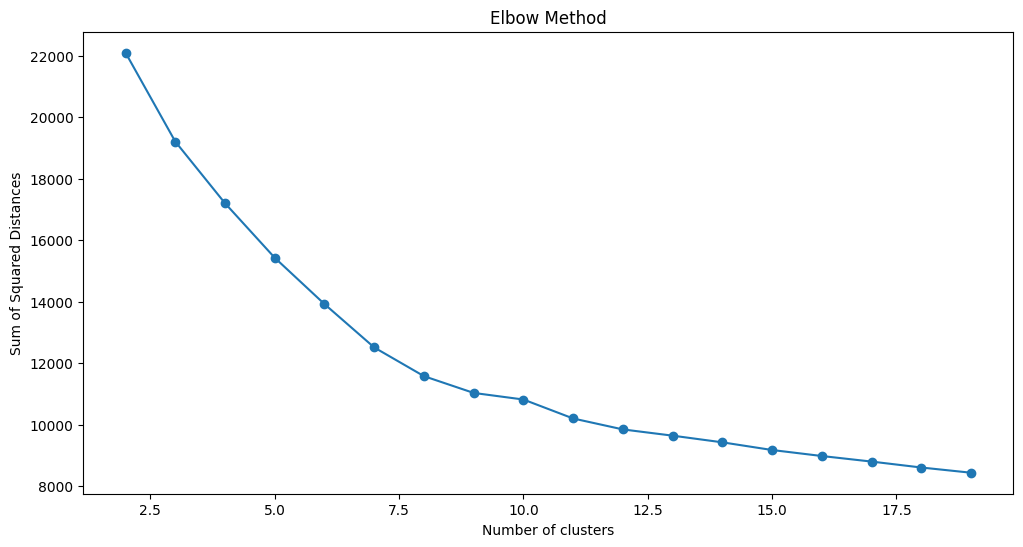

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), sse, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances');

In [ ]:
pca10 = PCA(n_components=10).fit(features)
X_proj3 = pd.DataFrame(pca10.fit_transform(features), columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',])
X_proj3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.380188,-0.352790,-1.160994,0.046512,0.454739,1.051831,0.722134,-0.080316,0.046153,-0.040007
1,-0.759559,-1.753405,0.748347,0.146347,-0.259931,-0.554047,-1.793874,-0.060897,-0.428256,-0.056716
2,0.350617,-0.734173,-0.300632,-1.018005,0.312765,0.443193,0.503648,-0.200580,0.266578,-0.071728
3,-0.489480,-1.570668,0.715378,0.537844,-0.591740,-0.562609,1.520111,-0.043905,-0.442388,-0.132343
4,-0.692940,1.263806,0.266842,-0.019529,-0.478469,-0.939711,-0.355031,-0.259614,-0.040187,-0.065726
...,...,...,...,...,...,...,...,...,...,...
2906,2.752801,-2.158800,1.802569,-4.332906,0.219067,-0.760525,0.021567,0.578530,1.028818,0.008170
2907,-0.965570,-0.677890,-1.108555,0.070811,0.511419,1.042225,-0.218308,0.981239,-0.157151,0.069785
2908,3.094173,-1.587447,1.719432,0.023039,1.166110,-0.620990,-0.684688,-0.086861,-0.048414,-0.041705
2909,1.395980,0.008456,0.545843,-0.008365,-0.498687,-0.700753,1.446894,-0.166990,-0.428794,-0.589570


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# print("accuracy 3 PCs")
# print(cross_val_score(LogisticRegression(), X_proj3, y, cv=5).mean())

# print("\naccuracy all 13 initial features")
# print(cross_val_score(LogisticRegression(), X, y, cv=5).mean())

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features)

# Extract relevant information
labels = kmeans.labels_  # Cluster labels for each data point
centroids = kmeans.cluster_centers_  # Coordinates of cluster centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


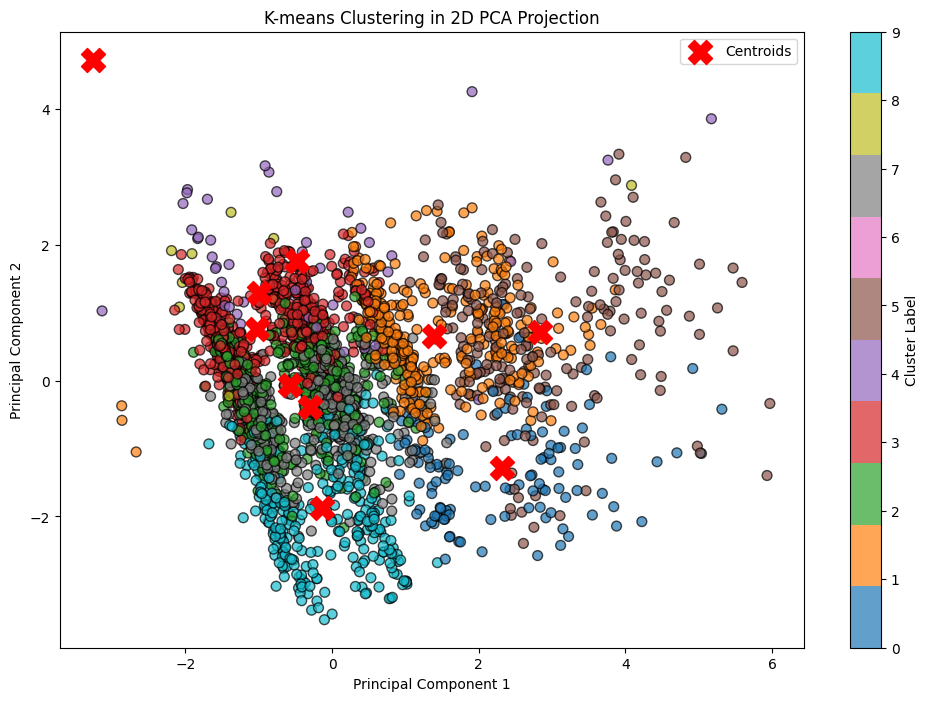

In [ ]:

# Fit KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features)

# Extract relevant information
labels = kmeans.labels_  # Cluster labels for each data point
centroids = kmeans.cluster_centers_  # Coordinates of cluster centroids


# Convert PCA result to DataFrame for easier handling
X_proj_df = pd.DataFrame(X_proj3, columns=[f'PC{i+1}' for i in range(10)])

# Project to 2D for visualization
X_proj_2d = X_proj_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

# Fit KMeans to the 2D PCA result
kmeans_2d = KMeans(n_clusters=10, random_state=0)
kmeans_2d.fit(X_proj_2d)

# Extract relevant information for the 2D projection
labels_2d = kmeans_2d.labels_  # Cluster labels for each data point in 2D space
centroids_2d = kmeans_2d.cluster_centers_  # Coordinates of cluster centroids in 2D space

# Plotting
plt.figure(figsize=(12, 8))

# Plot data points
scatter = plt.scatter(X_proj_2d['PC1'], X_proj_2d['PC2'], c=labels_2d, cmap='tab10', s=50, alpha=0.7, edgecolors='k')

# Plot centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering in 2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')  # Optional, shows a color bar indicating cluster labels

plt.show()


Conclusion: No patterm found~~~

Dead end
